# HEALTH INSURANCE PRICE PREDICTION
#  Using Random Forest Regression 

## IMPORTING LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## IMPORTING DATASETS

In [2]:
data_set=pd.read_csv('C:/Users/prabina/Desktop/amitpython/insurance.csv')
                

### HANDLING MISSING DATA IF ANY

In [4]:
data_set.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### ENCODING CATEGORICAL DATA

In [79]:
data_set['sex'].unique()

array(['female', 'male'], dtype=object)

In [80]:
data_set['sex']=data_set['sex'].map({'female':0,'male':1})

In [81]:
data_set['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [82]:
data_set['smoker']=data_set['smoker'].map({'yes':1,'no':0})

In [83]:
data_set['smoker'].unique()

array([1, 0], dtype=int64)

In [84]:
data_set['region']=data_set['region'].map({'northwest':1,'northeast':2,'southwest':3,'southeast':4})

## SPLITTING DEPENDENT AND INDEPENDENT VARIABLE

In [188]:
X=data_set.iloc[:,:-1].values

In [189]:
X

array([[19.  ,  0.  , 27.9 ,  0.  ,  1.  ,  3.  ],
       [18.  ,  1.  , 33.77,  1.  ,  0.  ,  4.  ],
       [28.  ,  1.  , 33.  ,  3.  ,  0.  ,  4.  ],
       ...,
       [18.  ,  0.  , 36.85,  0.  ,  0.  ,  4.  ],
       [21.  ,  0.  , 25.8 ,  0.  ,  0.  ,  3.  ],
       [61.  ,  0.  , 29.07,  0.  ,  1.  ,  1.  ]])

In [154]:
y=data_set.iloc[:,-1].values

In [155]:
y

array([16884.92,  1725.55,  4449.46, ...,  1629.83,  2007.94, 29141.36])

### SPLITTING TRAINING AND TEST DATA

In [156]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [157]:
y_train

array([ 9193.84,  8534.67, 27117.99, ..., 11931.13, 46113.51, 10214.64])

### TRAINING THE DATA SET

In [158]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(n_estimators=40,random_state=42)
regressor.fit(X_train,y_train)

RandomForestRegressor(n_estimators=40, random_state=42)

###  PREDICTING THE  DATA VALUES ON TEST DATA

In [159]:
y_pred=regressor.predict(X_test)

### COMPARING TEST DATA AND ACTUAL DATA

In [160]:
compare_predict=pd.DataFrame({'Y_test':y_test ,'Y_pred': y_pred })


In [161]:
compare_predict

,Y_test,Y_pred
0,9095.06825,9090.711332
1,5272.17580,5514.469461
2,29330.98315,28416.865396
3,9301.89355,13212.368506
4,33750.29180,34725.035940
...,...,...
263,47055.53210,46949.123129
264,12222.89830,12045.300025
265,6067.12675,6055.657370
266,63770.42801,46560.363555


### VISUALISATION OF PREDICTED AND ACTUAL DATA

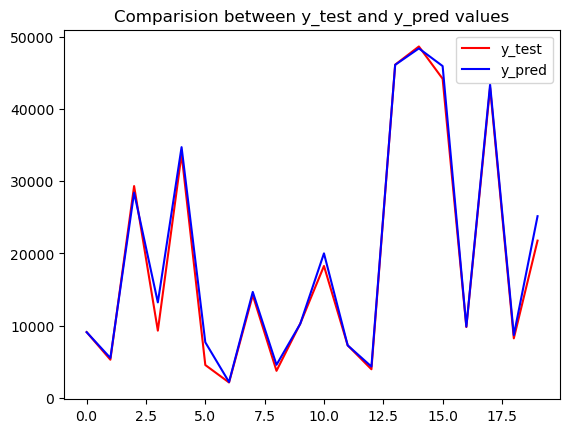

In [171]:

plt.title("Comparision between y_test and y_pred values")



plt.plot(y_test[0:20],color='r',label='y_test')
plt.plot(y_pred[0:20],color='b',label='y_pred')
plt.legend()

### PERFORMANCE SCORE OF TEST DATA

In [172]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8627183552471691

### PREDICTING THE  DATA VALUES ON TEST DATA

In [173]:
y_prediction=regressor.predict(X)

### PERFORMANCE SCORE OF Random forest Algorithm ON WHOLE DATA

In [174]:
from sklearn.metrics import r2_score
r2_score(y,y_prediction)

0.9488010439972828

### VISUALISATION OF PREDICTED AND ACTUAL DATA

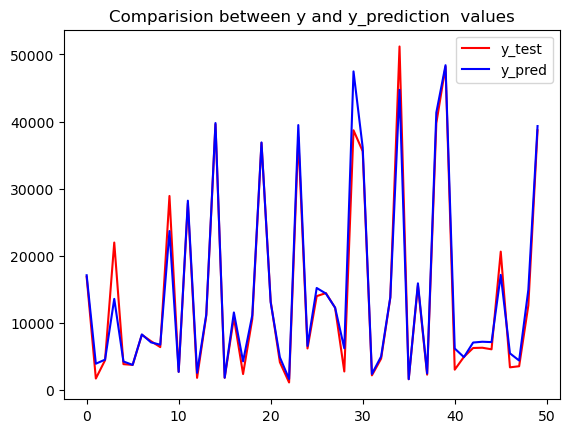

In [176]:

plt.title("Comparision between y and y_prediction  values")



plt.plot(y[0:50],color='r',label='y_test')
plt.plot(y_prediction[0:50],color='b',label='y_pred')
plt.legend()

## GRAPHIC USER INTERFACE (GUI)

In [177]:
from tkinter import *

In [191]:
def answer():
    a1=float(input1.get())
    a2=float(input2.get())
    a3=float(input3.get())
    a4=float(input4.get())
    a5=float(input5.get())
    a6=float(input6.get())
    
    result=regressor.predict([[a1,a2,a3,a4,a5,a6]])
    
    Label(temp,text='The Insurance is').grid(row=7)
    Label(temp,text=result).grid(row=7,column=1)



temp=Tk()

temp.title("Health Insurance Price Prediction")
Label(temp,text="Health Insurance Price Prediction",bg='black',fg='white').grid(row=0,columnspan=3)
Label(temp,text="Age").grid(row=1)
Label(temp,text="Sex (MALE=0, FEMALE=1)").grid(row=2)
Label(temp,text="BMI").grid(row=3)
Label(temp,text="No of Children").grid(row=4)
Label(temp,text="Are you a Smoker(if YES=1 / NO=0)").grid(row=5)
Label(temp,text="From which region do you belong(north[west/east]=1/2 or south[west/east]=3/4)").grid(row=6)

input1=Entry(temp)
input2=Entry(temp)
input3=Entry(temp)
input4=Entry(temp)
input5=Entry(temp)
input6=Entry(temp)


#position
input1.grid(row=1, column=1)
input2.grid(row=2, column=1)
input3.grid(row=3, column=1)
input4.grid(row=4, column=1)
input5.grid(row=5, column=1)
input6.grid(row=6, column=1)

Button(temp,text='predict',command=answer).grid()



mainloop()